In [87]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, SGDRegressor, LogisticRegression, SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, RepeatedKFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [88]:
df = pd.read_csv("hepatotoxicity_ALT_KlekFP_ready_set_after_conversion.csv", header=0, index_col=False)

In [89]:
df.head()

,ALT,KRFP1,KRFP2,KRFP3,KRFP4,KRFP5,KRFP6,KRFP7,KRFP8,KRFP9,...,KRFP4851,KRFP4852,KRFP4853,KRFP4854,KRFP4855,KRFP4856,KRFP4857,KRFP4858,KRFP4859,KRFP4860
0,32.60,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,37.20,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,44.10,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Columns: 4861 entries, ALT to KRFP4860
dtypes: float64(4861)
memory usage: 3.6 MB


In [91]:
df.describe()

,ALT,KRFP1,KRFP2,KRFP3,KRFP4,KRFP5,KRFP6,KRFP7,KRFP8,KRFP9,...,KRFP4851,KRFP4852,KRFP4853,KRFP4854,KRFP4855,KRFP4856,KRFP4857,KRFP4858,KRFP4859,KRFP4860
count,98.000000,98.000000,98.000000,98.0,98.0,98.0,98.0,98.0,98.0,98.0,...,98.0,98.000000,98.0,98.0,98.0,98.000000,98.0,98.0,98.0,98.0
mean,47.119898,0.693878,0.418367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.051020,0.0,0.0,0.0,0.051020,0.0,0.0,0.0,0.0
std,45.294039,0.463251,0.495827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.221171,0.0,0.0,0.0,0.221171,0.0,0.0,0.0,0.0
min,1.510000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
25%,29.775000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
50%,36.300000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
75%,49.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
max,273.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.000000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0


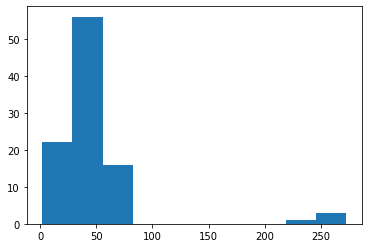

In [92]:
plt.hist(df['ALT'],histtype='bar')
plt.show()

In [93]:
columns = list(df.columns.values)
columns.remove('ALT')

In [94]:
df[columns].sum(axis=1).min()

30.0

In [95]:
df = df[df.ALT < 100].reset_index().drop('index', axis=1)

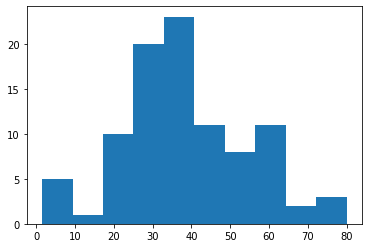

In [96]:
plt.hist(df['ALT'],histtype='bar')
plt.show()

In [97]:
df

,ALT,KRFP1,KRFP2,KRFP3,KRFP4,KRFP5,KRFP6,KRFP7,KRFP8,KRFP9,...,KRFP4851,KRFP4852,KRFP4853,KRFP4854,KRFP4855,KRFP4856,KRFP4857,KRFP4858,KRFP4859,KRFP4860
0,32.60,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,37.20,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,44.10,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,38.30,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,32.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,53.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,34.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
X = df[columns].values
y = df['ALT'].values

In [99]:
print(y)

[32.6  37.2   2.92  3.16 44.1  43.21 36.   22.8  27.1  35.9  45.3  28.1
 40.   80.   28.   38.6  57.   26.4  25.   31.   49.   32.   28.   45.
 34.   34.   43.   41.   68.   40.6  61.14 30.    2.27  1.51  1.89 66.6
 32.8  60.   32.   61.   44.   22.7  26.   49.   31.4  40.   20.   25.
 64.   49.   74.9  33.   34.4  36.7  33.4  55.7  37.8  44.2  21.6  36.6
 35.1  31.   36.   50.   29.   57.   35.   49.   64.   41.9  43.2  39.3
 25.   30.9  30.   20.   45.3  29.7  35.5  23.3  64.   29.   17.   49.
 20.   64.   64.   79.4  33.7  38.3  32.   53.55 34.5  60.  ]


In [100]:
print(X)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(X_train.shape)
print(X_test.shape)

(75, 4860)
(19, 4860)


In [102]:
models=[SGDRegressor(), SVR(), LinearRegression(), Lasso()]
params=[
    {'alpha' : [0.001, 0.0001, 0.00001],'learning_rate' : ['constant','optimal','invscaling']},
    {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')},
    {},
    {'alpha':[0.001, 0.005, 0.01,0.05,0.1,0.5,1]}
]

In [103]:
results=[]
for model, grid_params in zip(models, params):
    kfold = RepeatedKFold(n_splits=5, n_repeats=2, random_state=123)
    grid_search=GridSearchCV(estimator=model,param_grid=grid_params,scoring='neg_mean_squared_error',cv=kfold)
    grid_fit=grid_search.fit(X_train, y_train)
    results.append((grid_fit.best_estimator_, grid_fit.best_params_, grid_fit.best_score_*(-1)))

In [104]:
pd.DataFrame(results, columns=['Model', 'Params','MSE'])

,Model,Params,MSE
0,SGDRegressor(alpha=1e-05),"{'alpha': 1e-05, 'learning_rate': 'invscaling'}",1.605869e+02
1,"SVR(C=1, coef0=0.01, gamma='auto', kernel='lin...","{'C': 1, 'coef0': 0.01, 'degree': 3, 'gamma': ...",1.445986e+02
2,LinearRegression(),{},6.400359e+27
3,Lasso(alpha=0.5),{'alpha': 0.5},1.703920e+02


In [105]:
best_params=results[1][1]
print(best_params)

{'C': 1, 'coef0': 0.01, 'degree': 3, 'gamma': 'auto', 'kernel': 'linear'}


In [106]:
model=SVR(C=10, coef0=10, degree=3, gamma='auto', kernel='poly')
model.fit(X_train, y_train)

Y_pred=model.predict(X_test)

mse=mean_squared_error(y_test, Y_pred)
r2=r2_score(y_test, Y_pred)
mae=mean_absolute_error(y_test, Y_pred)

In [107]:
print("MSE=", mse)
print("MAE=", mae)
print("R2=", r2)

MSE= 244.8461844933474
MAE= 10.379018674907663
R2= 0.19435547841244172
